Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

# Problem 1

This assignment will focus on visualization techniques and plotting. In order to access the datasets used, please run the following code:

In [159]:
# This will install the package
# Remember: you may need to specify the repository (repo) used
# depending on your computer's configuration.
# Type `?install.packages` in R to learn more.
install.packages("Lock5Data", repos = "http://cran.us.r-project.org")
# Now load the package
library(Lock5Data)

# SET PLOT RENDER TO APPROACH ASPECT OF ±45° (lec6, slide 16/52).
options(repr.plot.width = 6.5, repr.plot.height = 5)

Warning message:
"package 'Lock5Data' is in use and will not be installed"

First, look at the `AllCountries` dataset (not `AllCountries1e`). For more information on this dataset and the variables in it, type `?AllCountries` into R after the `Lock5Data` package has been loaded. Follow the best practices from lesson 6 to make a plot that demonstrates the relationship between the percent of the country that has access to the Internet (`Internet` variable) and HIV infection rate (`HIV` variable). In particular, remember to

- Choose an appropriate plot type
- Label axes properly
- Ensure the proper use of a scale
- Make the plot aesthetically pleasing
- Label points that represent extreme or unexpected combinations of values
- Include source information
- Most importantly, make sure the code to produce the plot works

Extra credit may be given to plots that have additional useful information that is effectively communicated.

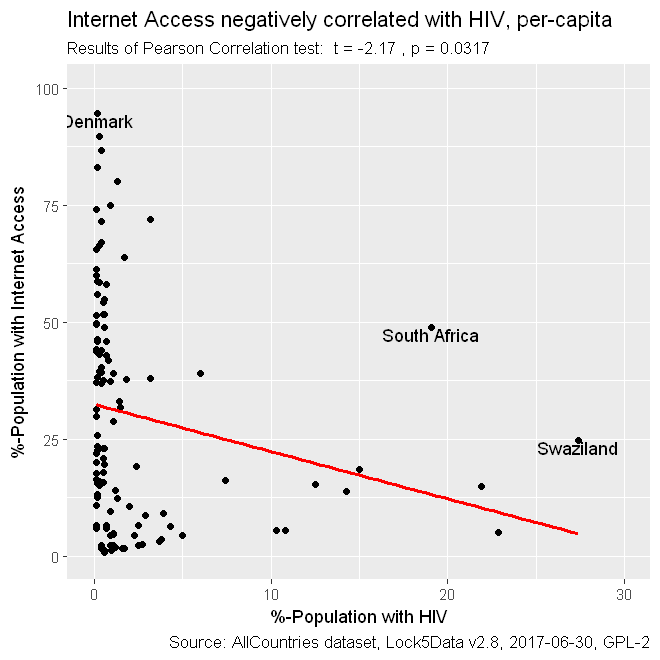

In [166]:
data("AllCountries")

# SET PLOT RENDER TO APPROACH ASPECT OF ±45° (lec6, slide 16/52).
options(repr.plot.width = 5.5, repr.plot.height = 5.5)

# subset AllCountries by only pertinent data, with no NA
df <- AllCountries[c("Country","HIV","Internet")]
df <- df[complete.cases(df), ]

# perform pearson correlation test
res <- cor.test(df$HIV, df$Internet, method = "pearson")
stat <- signif(res$statistic, digits = 3)
pval <- signif(res$p.value, digits = 3)

summary <- paste (paste("Results of Pearson Correlation test:  t =", stat, ", p =", pval, sep=" "))

# subset labels to annotate, interesting to the eye
g1 <- subset(df, (Country == "Swaziland") | (Country == "South Africa") | (Country == "Denmark" ))

# plot it up!
p <- ggplot(data = df, aes(x = HIV, y = Internet)) + geom_point() +     
    xlab("%-Population with HIV") +
    ylab("%-Population with Internet Access") +
    coord_cartesian(xlim = c(0, 30), ylim = c(0, 100)) +
    geom_smooth(method = "lm", se=FALSE, color="red", formula = y ~ x) +
    geom_text(data=g1, label=g1$Country, vjust=1) + # add label for red point

    labs(title = "Internet Access negatively correlated with HIV, per-capita",
         subtitle = summary,
       caption = "Source: AllCountries dataset, Lock5Data v2.8, 2017-06-30, GPL-2") 
p

---


# Problem 2

Next, examine the `BikeCommute` data set. These data describe a six-month experiment by Dr. Jeremy Groves. In his experiment, two bicycles were randomly selected for the doctor's 27-mile round trip commute on a given day. The experiment was designed to test the differences in using a steel-frame versus a carbon-frame bike, with everything else on the two bicycles being held equal. Using the data in the data frame, create a **single** visualization that illustrates the change in average speed (`AvgSpeed`) over time. As in the last problem, remember to

- Choose an appropriate plot type
- Label axes properly
- Ensure the proper use of a scale
- Make the plot aesthetically pleasing
- Label points that represent extreme or unexpected combinations of values
- Include source information
- Most importantly, make sure the code to produce the plot works

In order to simplify your plotting, the `Date` variable is changed from a factor to an object of class `Date` in R. Extra credit may be given to plots that have additional useful information that is effectively communicated.

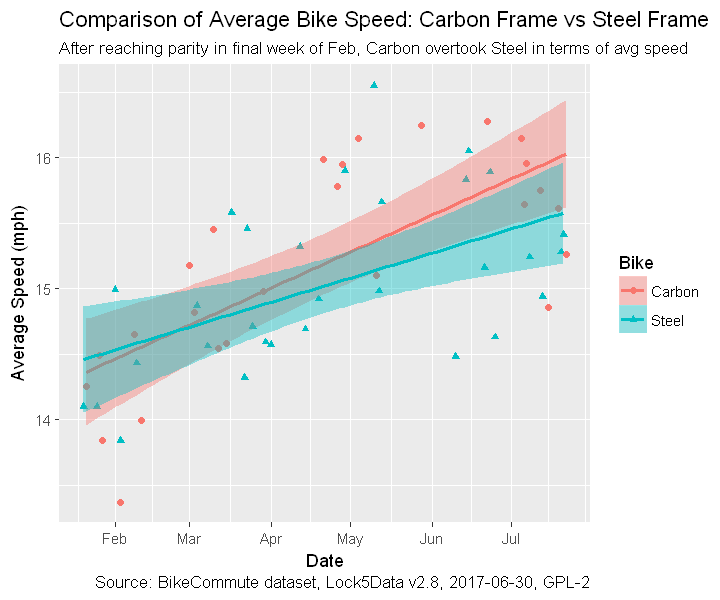

In [168]:
library(Lock5Data)
data("BikeCommute")

# SET PLOT RENDER TO APPROACH ASPECT OF ±45° (lec6, slide 16/52).
options(repr.plot.width = 6, repr.plot.height = 5)

BikeCommute$Date <- as.Date(BikeCommute$Date,format = "%d/%m/%y")

ggplot(BikeCommute, aes(x=Date,y=AvgSpeed)) +
        ylab("Average Speed (mph)") +
        geom_point(aes(colour=Bike, shape=Bike)) +
        geom_smooth(method=lm, aes(fill=Bike, color=Bike)) +
        labs(title = "Comparison of Average Bike Speed: Carbon Frame vs Steel Frame",
         subtitle = "After reaching parity in final week of Feb, Carbon overtook Steel in terms of avg speed",
       caption = "Source: BikeCommute dataset, Lock5Data v2.8, 2017-06-30, GPL-2")
